### Mount the drive with the colab notebook to access the content in the drive

In [ ]:
## Make 1 or True  if you run colab
## Other wise 0 or False
##if you run in  colab

colab =1                                                    

if colab ==True:
  data_dir='/content/diabetes.csv'
else:
  data_dir='diabetes.csv'

## The python Library we used are :

<ul>
<li>Numpy</li>
<li>Pandas</li>
<li>scipy</li>
<li>Seaborn</li>
<li>Sklearn</li>
<li>xgboost</li>
</ul>

<b>Numpy : </b> NumPy is a general-purpose array-processing package. It provides a high-performance multidimensional array object, and tools for working with these arrays. It is the fundamental package for scientific computing with Python. <br>
<b>Pandas : </b> In Python programming language for data manipulation and analysis Pandas is widely Used . In particular, it offers data structures and operations for manipulating numerical tables and time series.<br>
<b>SciPy : </b>It  is a free and open-source Python library used for scientific computing and technical computing. SciPy contains modules for optimization, linear algebra, integration, interpolation, special functions, FFT, signal and image processing, ODE solvers and other tasks common in science and engineering.

<b>Seaborn : </b> Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.<br>
<b> Sklearn : </b>  Scikit-learn is a library in Python that provides many unsupervised and supervised learning algorithms. It’s built upon some of the technology you might already be familiar with, like NumPy, pandas, and  Matplotlib! The functionality that scikit-learn provides include:
<ul>
<li>Regression</li>
<li>Classification</li>
<li>Model selection
Preprocessing</li>

</ul>
<b>XGBoost :</b> XGBoost is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable. It implements machine learning algorithms under the Gradient Boosting framework. XGBoost provides a parallel tree boosting (also known as GBDT, GBM) that solve many data science problems in a fast and accurate way. The same code runs on major distributed environment (Hadoop, SGE, MPI) and can solve problems beyond billions of examples.



### Loading of different packagaes and APIs

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# sns.set(style="whitegrid")
import warnings 
from sklearn.svm import SVC, NuSVC
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors  import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
import xgboost as xgb
from scipy import stats
from scipy.stats import uniform, randint
from sklearn.metrics import f1_score
from sklearn.model_selection import KFold, StratifiedKFold, RepeatedStratifiedKFold
from sklearn.metrics import roc_curve, auc, accuracy_score
# from tflearn.data_utils import to_categorical
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report
from scipy import interp
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from keras.utils import to_categorical

Using TensorFlow backend.


### Utility Functions

In [ ]:
Renamed_feature= []               #list of names that will rename to feature column
all_clf_res=[]                    #every classifier auc values are stored in it
random_initializer=20            #random initializer
n_dots=50
##########################################################

for i in range(8):
  #for renaming dataset of columns features F1 -- F8 
  Renamed_feature.append('F'+str(i+1)) 


###################################################################
# this function if for outlair rejection with
# 1.5 times of IQR that means that are
# significant in gaussian distribution
def IQR (data):

  '''
  Parameters :
  Input - data is the pandas type variable

  Return - dataframe with outleir rejection
  of input data 

  '''
  #input dataset as data
  for i in range(8):                                        # for every feature
    Q1 = data[Renamed_feature[i]].quantile(0.25)
    Q3 = data[Renamed_feature[i]].quantile(0.75)
    IQR = Q3-Q1                                             #find IQR
    LW = (Q1 - 1.5 * IQR)                                   #find lower boundary
          # print(LW)
    UW = (Q3 + 1.5 * IQR)                                   #find upper boundary
          # print(UW)
    data = data[data[Renamed_feature[i]]<UW]                #drop greater than upper limit
    data = data[data[Renamed_feature[i]]>LW]                #drop smaller than lower limit

  return data


############################################################
#outlier rejection with different condition

def outlier_Rejection (data,iqr):
  '''
  Parameters :
  Input - 
  data is the pandas type variable
  iqr- for drop the outleir 
  Return - dataframe with outleir rejection
  filled with Input parameter

  '''
  
  # outlier_Rejection with conditional input

  if iqr == True:                                          #reject outleir in IQR range
    data = IQR (data)

  return data


############################################################
def replace_zero(data, field, target):
    
    mean_by_target = data.loc[data[field] != 0, [field, target]].groupby(target).mean()
    data.loc[(data[field] == 0)&(data[target] == 0), field] = mean_by_target.iloc[0][0]
    data.loc[(data[field] == 0)&(data[target] == 1), field] = mean_by_target.iloc[1][0]


############################################################
def metrics (y_true, y_pred, probas_):


  '''
  Parameters :
  Input - 
  y_true - true  value of input data    
  y_pred- predicted  value of input data  
  probas_- probability/confidence of predicted output

  return -True Negative(tn),False Positive(fp),False Negative(fn)
  True positive(tp),AUC(roc_auc),False Positive Rate(fpr),
  True positive rate(tpr)

  '''


  points=n_dots*'-'
  print(points)
#    print("Best parameters set found on development set:")
#    print(clf.best_params_)
  fpr, tpr, thresholds = roc_curve(y_true, probas_[:, 1])
  tprs.append(interp(mean_fpr, fpr, tpr))
  tprs[-1][0] = 0.0
  roc_auc = auc(fpr, tpr)
  #  aucs.append(roc_auc)
  print("Detailed classification report for current fold:")
  print()
  print(classification_report(y_true, y_pred))
  print()
  print("Area Under ROC (AUC): {}".format(roc_auc))
  print()
  print('Confusion Matrix for current fold: ')
  print(confusion_matrix(y_true, y_pred))
  print()
  print("Accuracy for Current Fold: {}".format(accuracy_score(y_true, y_pred)))
  print()
  tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

  return  tn, fp, fn, tp, roc_auc, fpr, tpr

############################################################


def average_ROC(mean_fpr,tprs,aucs,TP,TN,FP,FN):

  '''
  Parameters :
  mean_fpr - Mean False positive rate
  tprs -values of true positive rate
  aucs  - values of auc
  TP    - True positive 
  TN    - True Negative
  FP    - False Positiv
  FN    - False Negative

  Output - 
  Visalization of TPR vs FPR plot
  '''
  sen = (np.sum(TP))/(np.sum(TP)+np.sum(FN))
  spe = (np.sum(TN))/(np.sum(TN)+np.sum(FP))

  mean_tpr = np.mean(tprs, axis=0)
  mean_tpr[-1] = 1.0
  # mean_auc = auc(mean_fpr, mean_tpr)
  mean_auc = np.mean(aucs)
  std_auc = np.std(aucs)
  # plt.figure(figsize=(8, 5))
  # plt.grid(True)
  ax = plt.axes()
  ax.grid(color='lightgray', linestyle='-', linewidth=.5)
  # Setting the background color
  ax.set_facecolor("white")
  
  ax.spines['bottom'].set_color('#000000')
  ax.spines['top'].set_color('#000000') 
  ax.spines['right'].set_color('#000000')
  ax.spines['left'].set_color('#000000')

  plt.plot(mean_fpr, mean_tpr, color='blue',
          label=r'Avg. ROC (AUC (avg $\pm$ std) = %0.3f $\pm$ %0.3f)' % (mean_auc, std_auc),
          lw=2, alpha=.8)
  
  plt.scatter((1-spe), sen, s=80, c='r', marker='x',)
  plt.scatter(0, sen, s=80, c='r', marker='x',)
  plt.scatter((1-spe),0, s=80, c='r', marker='x',)
  plt.axhline(y=sen, color='r', linestyle='--')
  plt.axvline(x=(1-spe), color='r', linestyle='--')
  plt.text((1-spe), 0.02, "FPR={:0.3f}".format((1-spe)))
  plt.text(0.009, sen+0.05, "TPR={:0.3f}".format(sen))

  std_tpr = np.std(tprs, axis=0)
  tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
  tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
  plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='darkgray', alpha=0.5,
                  label=r'$\pm$ 1 Standard deviation')

  plt.xticks(np.arange(0.0, 1.01, step=0.1))
  plt.yticks(np.arange(0.0, 1.01, step=0.1))
  left=0.0
  right=1.0
  plt.xlim(left, right)
  plt.ylim(left, right)
  plt.xlabel('False Positive Rate (FPR)')
  plt.ylabel('True Positive Rate (TPR)')
  plt.legend(loc="lower right")
  # plt.grid(True)
  plt.show()
   
############################################################
def plot_Current_ROC(fpr,tpr,iterator,roc_auc):
  
  '''
  Parameters :
  Input - 
  fpr - False positive rate
  tpr - True positive rate
  roc_auc -auc values of roc curve

  Output - 
  Visalization of current roc curve

  '''
  plt.plot(fpr,
          
          tpr,
          # Color[iterator],
          alpha=0.35,
          # label='macro-average ROC (AUC = {0:0.3f})'.format(roc_auc)
          # +FOLD[iterator],
          linewidth=1)
   
############################################################

   
def creat_Model (classifier, X_Train, Y_Train, tuned_parameters, verbose):

  '''
  Parameters :
  Input - 
  X_Train -train data 
  Y_Train - label/output of train data
  tuned_parameters =parameters of models
  verbose = condition about model

  Output - 
  Returned a tuned classifier using grid search
  '''
  clf = GridSearchCV(classifier,
                    tuned_parameters,
                    verbose=verbose,
                    cv=5,
                    scoring='roc_auc',
                    n_jobs=-1)
  clf.fit(X_Train, Y_Train)
  return clf
############################################################

def average_performance(aucs,Accuracy,TP,TN,FP,FN): 

  '''
  Parameters :
  Input - 
  aucs= values of aucs
  Accuracy - value of accuracy
  TP  - True Positive
  TN  - True Negative
  FP  - False Positive
  FN  - False Negative


  Output - 
  It prints the average aucs,accuarcy,confusion matrix
  '''

  print()
  n_dotsav=(n_dots-len('Average'))//2
    
  print('-'*n_dotsav+'Average'+'-'*n_dotsav)
  print("AUC (Avg. +/- Std.) is  %0.3f +/- %0.3f" %(np.mean(aucs),np.std(aucs)))
  print("Accuracy (Avg. +/- Std.) is  %0.3f +/- %0.3f" %(np.mean(Accuracy),np.std(Accuracy)))
  cm = [[int(np.mean(TP)), int(np.mean(FP))],[int(np.mean(FN)), int(np.mean(TN))]]
  print ('Avg. CM is '+str(cm))
  cm = [[int(np.sum(TP)), int(np.sum(FP))],[int(np.sum(FN)), int(np.sum(TN))]]
  print ('Total for all folds CM is '+str(cm))
  re_auc=str(round(np.mean(aucs), 3))+'+/-'+str(round(np.std(aucs),3))
  all_clf_res.append(re_auc)
    
############################################################

#this  function is for algorithm based feature selection 
def feature_Selector(data, algo, n_feature):
    '''
    Parameters :
    Input - 
    data - It is the pandas type variable
    algo - type of algorith PCA,ICA,Correlation


    Output - 
    It prints the average aucs,accuarcy,confusion matrix
    '''
    if algo=='PCA':                                                   #for pca algorithm
        X_Data= data.iloc[:,:8].values
        pca = PCA(n_components=n_feature)                             #number of feature
        X_Data = pca.fit_transform(X_Data)
        return X_Data , data.iloc[:,8:].values

    if algo == 'ICA':
        X_Data= data.iloc[:,:8].values
        ICA = FastICA(n_components=n_feature, random_state=12) 
        X_Data = ICA.fit_transform(X_Data)
        return X_Data , data.iloc[:,8:].values
    
    if algo =='corr':                                                   #for ica algorithm
        if n_feature ==4:
            data = data[['F2','F5','F4','F6','Outcome']]                #for 4 feature
            return data.iloc[:,:4].values, data.iloc[:,4:].values
        if n_feature ==6:
            data = data[['F1','F2','F4','F5','F6','F8','Outcome']]       #for 6 feature
            return data.iloc[:,:6].values, data.iloc[:,6:].values
        
    if algo == 'None':
        return data.iloc[:,:8].values, data.iloc[:,8:].values            #if feature selection is off all features are counted

### Read the data from the drive using pandas (Python Data Analysis Library)

In [ ]:

if colab ==True:
  data = pd.read_csv(data_dir)
else:
  data = pd.read_csv(data_dir)
data.shape

(768, 9)

In [ ]:
data.head(n=6)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0


### Renaming the Features by F1, F2, and so on ......
---
New Name | Original Name | Comments| 
---|---|---|
F1|Pregnancies|Number of times pregnant|
F2|Glucose|Plasma glucose concentration a 2 hours in an oral glucose tolerance test|
F3|BloodPressure|Diastolic blood pressure (mm Hg)|
F4|SkinThickness|Triceps skin fold thickness (mm)|
F5|Insulin|2-Hour serum insulin (mu U/ml)|
F6|BMI|Body mass index (weight in kg/(height in m)^2)|
F7|DiabetesPedigreeFunction|Diabetes pedigree function|
F8|Age|Age (years)|




In [ ]:
data = pd.DataFrame({'F1':data.iloc[:,:8].values[:,0],
                     'F2':data.iloc[:,:8].values[:,1],
                     'F3':data.iloc[:,:8].values[:,2],
                     'F4':data.iloc[:,:8].values[:,3],
                     'F5':data.iloc[:,:8].values[:,4],
                     'F6':data.iloc[:,:8].values[:,5],
                     'F7':data.iloc[:,:8].values[:,6],
                     'F8':data.iloc[:,:8].values[:,7],
                     'Outcome':data.iloc[:,8:].values[:,0]})

### Show the statistical description of the data which sumarize the central tendency, dispersion, and shape of a data distribution.



In [ ]:
data.describe()

,F1,F2,F3,F4,F5,F6,F7,F8,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Data Preprocessing  

### Preprocessing Selection
---
Process Selector | Preprocessing | 
---|---|
P|Outlier Rejection|
Q|Filling Missing Value|
R|Standardization|

**Each P, Q, and R process has four techniques for feature selection which are N/A, PCA, ICA, and correlation-based feature selection**

In [ ]:
data = outlier_Rejection (data,iqr=True)

for col in ['F2', 'F3', 'F4', 'F5', 'F6']:   
    replace_zero(data, col, 'Outcome')              
                        
X_Data,Y_Data = feature_Selector(data, algo='corr', n_feature=6)    
print('Shape After Preprocessing ' + str(X_Data.shape))


kf = StratifiedKFold(n_splits=5,
                     shuffle=False,
                     random_state=random_initializer)

Shape Before Process: (768, 9)
Shape After outlier Removed: (636, 9)
Shape After Filling Missing Value: (636, 9)
Shape After Feature Selection: (636, 9)


# Processed Data Plot and Presenation

### Analyzing KNN model

--------------------------------------------------
Detailed classification report for current fold:

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        88
           1       0.85      0.85      0.85        40

    accuracy                           0.91       128
   macro avg       0.89      0.89      0.89       128
weighted avg       0.91      0.91      0.91       128


Area Under ROC (AUC): 0.9413352272727272

Confusion Matrix for current fold: 
[[82  6]
 [ 6 34]]

Accuracy for Current Fold: 0.90625

--------------------------------------------------
Detailed classification report for current fold:

              precision    recall  f1-score   support

           0       0.89      0.94      0.92        87
           1       0.86      0.75      0.80        40

    accuracy                           0.88       127
   macro avg       0.87      0.85      0.86       127
weighted avg       0.88      0.88      0.88       127


Area Und

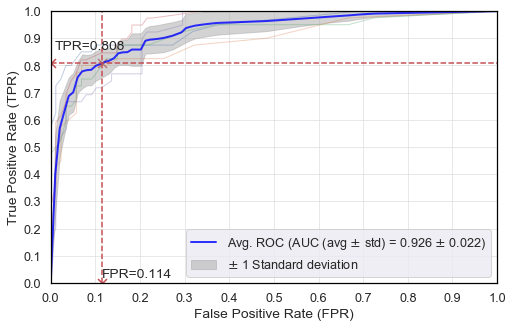


---------------------Average---------------------
AUC (Avg. +/- Std.) is  0.926 +/- 0.022
Accuracy (Avg. +/- Std.) is  0.862 +/- 0.032
Avg. CM is [[32, 10], [7, 77]]
Total for all folds CM is [[160, 50], [38, 388]]


In [ ]:
Accuracy = []                                                                # for store the value of accuracy 
FP = []                                                                      # for store False Positive 
TN = []                                                                      # for True Negative
FN = []                                                                      # for False Negative
TP = []                                                                      # for True Positive
tprs = []                                                                    # for true positive rates
aucs_kNN = []                                                                # for store the values of auc
iterator=0
mean_fpr = np.linspace(0, 1, 100)
fig = plt.figure(figsize=(8, 5))

for train_index, test_index in kf.split(X_Data,Y_Lavel):                     # split in train and test
    #   print("TRAIN:", train_index, "TEST:", test_index)
    X_Train, X_Test = X_Data[train_index], X_Data[test_index]                #train data and label
    Y_Train, Y_Test = Y_Lavel[train_index], Y_Lavel[test_index]              #test data and label

    ###########################################
    # define the hyper parameters of Knn
    n_neighbors = [1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31,33,35,37,39,41,43,45,47,49]
    leaf_size = [5,10,15,20,25,30,35,40,45,50]
    Distance = [1,2]
    ############################################


    tuned_parameters = [ {'n_neighbors': n_neighbors,                         #define parameters with different algorithm
                        'algorithm' : ['brute'],
                        'p':Distance},

                         {'n_neighbors': n_neighbors, 
                        'algorithm' : ['ball_tree'],
                        'leaf_size' : leaf_size,
                        'p':Distance},

                        {'n_neighbors': n_neighbors, 
                        'algorithm' : ['kd_tree'],
                        'leaf_size' : leaf_size,
                        'p':Distance}]

    clf = creat_Model (classifier = KNeighborsClassifier(),                     #create the model 
                      X_Train = X_Train,
                      Y_Train = Y_Train,
                      tuned_parameters = tuned_parameters,
                      verbose=0)

    tn, fp, fn, tp, roc_auc, fpr, tpr = metrics (y_true = Y_Test,               #get the values of  model evaluation 
                                                y_pred = clf.predict(X_Test),
                                                probas_ = clf.predict_proba(X_Test))
    tprs.append(interp(mean_fpr, fpr, tpr))                                     
    tprs[-1][0] = 0.0
    aucs_kNN.append(roc_auc)
    plot_Current_ROC (fpr,tpr,iterator,roc_auc)                                 #plot the roc of current fold
    iterator += 1
    TN.append(tn)
    FP.append(fp)
    FN.append(fn)
    TP.append(tp)
    Accuracy.append(accuracy_score(Y_Test, clf.predict(X_Test)))
average_ROC(mean_fpr,tprs,aucs_kNN,TP,TN,FP,FN)                                 #plot average roc curve
average_performance(aucs_kNN,Accuracy,TP,TN,FP,FN)                              #print the average performance of the model

### Analyzing  Decision Trees Classifier

--------------------------------------------------
Detailed classification report for current fold:

              precision    recall  f1-score   support

           0       0.92      0.90      0.91        88
           1       0.79      0.82      0.80        40

    accuracy                           0.88       128
   macro avg       0.85      0.86      0.86       128
weighted avg       0.88      0.88      0.88       128


Area Under ROC (AUC): 0.9051136363636364

Confusion Matrix for current fold: 
[[79  9]
 [ 7 33]]

Accuracy for Current Fold: 0.875

--------------------------------------------------
Detailed classification report for current fold:

              precision    recall  f1-score   support

           0       0.85      0.90      0.87        87
           1       0.74      0.65      0.69        40

    accuracy                           0.82       127
   macro avg       0.80      0.77      0.78       127
weighted avg       0.81      0.82      0.82       127


Area Under

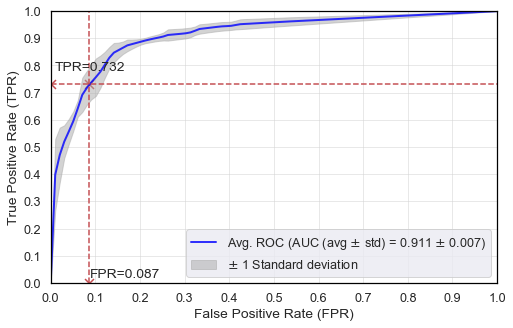


---------------------Average---------------------
AUC (Avg. +/- Std.) is  0.911 +/- 0.007
Accuracy (Avg. +/- Std.) is  0.857 +/- 0.021
Avg. CM is [[29, 7], [10, 80]]
Total for all folds CM is [[145, 38], [53, 400]]


In [ ]:
Accuracy = []                                                                # for store the value of accuracy 
FP = []                                                                      # for store False Positive 
TN = []                                                                      # for True Negative
FN = []                                                                      # for False Negative
TP = []                                                                      # for True Positive
tprs = []                                                                    # for true positive rates
aucs_Tree = []                                                               # for store the values of auc of tree model
iterator=0
mean_fpr = np.linspace(0, 1, 100)
fig = plt.figure(figsize=(8, 5))

for train_index, test_index in kf.split(X_Data,Y_Lavel):
    #   print("TRAIN:", train_index, "TEST:", test_index)
    X_Train, X_Test = X_Data[train_index], X_Data[test_index]
    Y_Train, Y_Test = Y_Lavel[train_index], Y_Lavel[test_index]

                                                                            # define the decision tree parameters 

    tuned_parameters = {'criterion': ['gini','entropy'],
                       'splitter': ['best'],
                       'min_samples_split':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0],
                       'min_samples_leaf': [1,2,3,4,5] }

    clf = creat_Model (classifier = DecisionTreeClassifier( random_state=random_initializer),
                      X_Train = X_Train,                                    # create the model using DecisionTree Classifier 
                      Y_Train = Y_Train,
                      tuned_parameters = tuned_parameters,
                      verbose=0)

    tn, fp, fn, tp, roc_auc, fpr, tpr = metrics (y_true = Y_Test,           #get the evaluation parameters of model
                                                y_pred = clf.predict(X_Test),
                                                probas_ = clf.predict_proba(X_Test))
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    aucs_Tree.append(roc_auc)                                                # plot the roc of current fold
    iterator += 1
    TN.append(tn)
    FP.append(fp)
    FN.append(fn)
    TP.append(tp)
    Accuracy.append(accuracy_score(Y_Test, clf.predict(X_Test)))
average_ROC(mean_fpr,tprs,aucs_Tree,TP,TN,FP,FN)                             #plot average roc curve
average_performance(aucs_Tree,Accuracy,TP,TN,FP,FN)                          #print the average performance of the model

### Analyzing Random Forest Classifier

--------------------------------------------------
Detailed classification report for current fold:

              precision    recall  f1-score   support

           0       0.93      0.88      0.90        88
           1       0.76      0.85      0.80        40

    accuracy                           0.87       128
   macro avg       0.84      0.86      0.85       128
weighted avg       0.87      0.87      0.87       128


Area Under ROC (AUC): 0.9251420454545456

Confusion Matrix for current fold: 
[[77 11]
 [ 6 34]]

Accuracy for Current Fold: 0.8671875

--------------------------------------------------
Detailed classification report for current fold:

              precision    recall  f1-score   support

           0       0.88      0.92      0.90        87
           1       0.81      0.72      0.76        40

    accuracy                           0.86       127
   macro avg       0.84      0.82      0.83       127
weighted avg       0.86      0.86      0.86       127


Area U

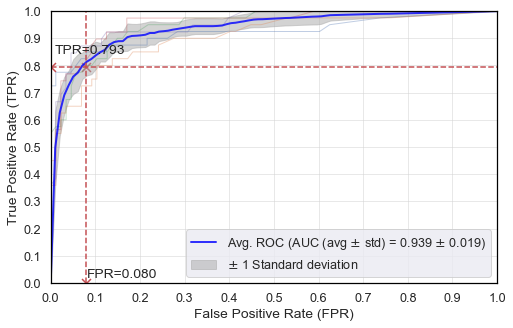


---------------------Average---------------------
AUC (Avg. +/- Std.) is  0.939 +/- 0.019
Accuracy (Avg. +/- Std.) is  0.881 +/- 0.017
Avg. CM is [[31, 7], [8, 80]]
Total for all folds CM is [[157, 35], [41, 403]]


In [ ]:
Accuracy = []                                                                # for store the value of accuracy 
FP = []                                                                      # for store False Positive 
TN = []                                                                      # for True Negative
FN = []                                                                      # for False Negative
TP = []                                                                      # for True Positive
tprs = []                                                                    # for true positive rates
aucs_Forest = []                                                             # for store the values of auc of Random Forest model
iterator=0
mean_fpr = np.linspace(0, 1, 100)
fig = plt.figure(figsize=(8, 5))

for train_index, test_index in kf.split(X_Data,Y_Lavel):                     #split dataset into train /test
#   print("TRAIN:", train_index, "TEST:", test_index)
    X_Train, X_Test = X_Data[train_index], X_Data[test_index]                # data and label of train dataset
    Y_Train, Y_Test = Y_Lavel[train_index], Y_Lavel[test_index]              # data and label of test dataset

    # parameters of Random Forest model
    tuned_parameters = {'criterion': ['gini','entropy']}

    clf = creat_Model (classifier = RandomForestClassifier( random_state=random_initializer),
                      X_Train = X_Train,                                      # create a model using random forest classifier
                      Y_Train = Y_Train,
                      tuned_parameters = tuned_parameters,
                      verbose=0)

    tn, fp, fn, tp, roc_auc, fpr, tpr = metrics (y_true = Y_Test,              #evaluation parameters of random forest model
                                                y_pred = clf.predict(X_Test),
                                                probas_ = clf.predict_proba(X_Test))
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    aucs_Forest.append(roc_auc)
    plot_Current_ROC (fpr,tpr,iterator,roc_auc)                               #plot the roc of current fold
    iterator += 1
    TN.append(tn)
    FP.append(fp)
    FN.append(fn)
    TP.append(tp)
    Accuracy.append(accuracy_score(Y_Test, clf.predict(X_Test)))
average_ROC(mean_fpr,tprs,aucs_Forest,TP,TN,FP,FN)                            #plot average roc curve
average_performance(aucs_Forest,Accuracy,TP,TN,FP,FN)                         #print the average performance of the model

### Analyzing AdaBoost Classifier

--------------------------------------------------
Detailed classification report for current fold:

              precision    recall  f1-score   support

           0       0.90      0.94      0.92        88
           1       0.86      0.78      0.82        40

    accuracy                           0.89       128
   macro avg       0.88      0.86      0.87       128
weighted avg       0.89      0.89      0.89       128


Area Under ROC (AUC): 0.9360795454545454

Confusion Matrix for current fold: 
[[83  5]
 [ 9 31]]

Accuracy for Current Fold: 0.890625

--------------------------------------------------
Detailed classification report for current fold:

              precision    recall  f1-score   support

           0       0.86      0.92      0.89        87
           1       0.79      0.68      0.73        40

    accuracy                           0.84       127
   macro avg       0.83      0.80      0.81       127
weighted avg       0.84      0.84      0.84       127


Area Un

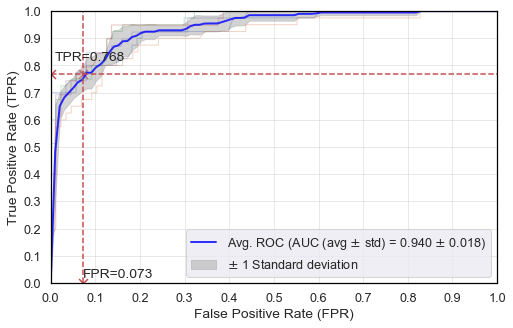


---------------------Average---------------------
AUC (Avg. +/- Std.) is  0.940 +/- 0.018
Accuracy (Avg. +/- Std.) is  0.877 +/- 0.019
Avg. CM is [[30, 6], [9, 81]]
Total for all folds CM is [[152, 32], [46, 406]]


In [ ]:
Accuracy = []                                                                # for store the value of accuracy 
FP = []                                                                      # for store False Positive 
TN = []                                                                      # for True Negative
FN = []                                                                      # for False Negative
TP = []                                                                      # for True Positive
tprs = []                                                                    # for true positive rates
aucs_aBoost = []                                                             # for store the values of auc of Adaboost model
iterator=0

mean_fpr = np.linspace(0, 1, 100)
fig = plt.figure(figsize=(8, 5))


for train_index, test_index in kf.split(X_Data,Y_Lavel):                     #split into train and test 
    #   print("TRAIN:", train_index, "TEST:", test_index)
    X_Train, X_Test = X_Data[train_index], X_Data[test_index]                #data and label
    Y_Train, Y_Test = Y_Lavel[train_index], Y_Lavel[test_index]              #data and label

    #####################################################
    # define the parameters of adaboost algorithm
    #####################################################
    tuned_parameters = { 'algorithm': ['SAMME','SAMME.R'],
                       'learning_rate':[0.1,0.5,1.0],
                       'n_estimators': [10,50,100,200]}

    
    clf = creat_Model (classifier = AdaBoostClassifier( random_state=random_initializer),
                      X_Train = X_Train,                                      # create a model using  AdaBoost Classifier
                      Y_Train = Y_Train,
                      tuned_parameters = tuned_parameters,
                      verbose=0)
    tn, fp, fn, tp, roc_auc, fpr, tpr = metrics (y_true = Y_Test,             # model evaluation parametrs
                                                y_pred = clf.predict(X_Test),
                                                probas_ = clf.predict_proba(X_Test))
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    aucs_aBoost.append(roc_auc)
    plot_Current_ROC (fpr,tpr,iterator,roc_auc)                              #plot the roc of current fold
    iterator += 1
    TN.append(tn)
    FP.append(fp)
    FN.append(fn)
    TP.append(tp)
    Accuracy.append(accuracy_score(Y_Test, clf.predict(X_Test)))
average_ROC(mean_fpr,tprs,aucs_aBoost,TP,TN,FP,FN)                           #plot average roc curve
average_performance(aucs_aBoost,Accuracy,TP,TN,FP,FN)                        #print the average performance of the model

### Analyzing Naive Bayes Model

--------------------------------------------------
Detailed classification report for current fold:

              precision    recall  f1-score   support

           0       0.85      0.89      0.87        88
           1       0.72      0.65      0.68        40

    accuracy                           0.81       128
   macro avg       0.79      0.77      0.78       128
weighted avg       0.81      0.81      0.81       128


Area Under ROC (AUC): 0.859375

Confusion Matrix for current fold: 
[[78 10]
 [14 26]]

Accuracy for Current Fold: 0.8125

--------------------------------------------------
Detailed classification report for current fold:

              precision    recall  f1-score   support

           0       0.84      0.87      0.85        87
           1       0.69      0.62      0.66        40

    accuracy                           0.80       127
   macro avg       0.76      0.75      0.76       127
weighted avg       0.79      0.80      0.79       127


Area Under ROC (AUC

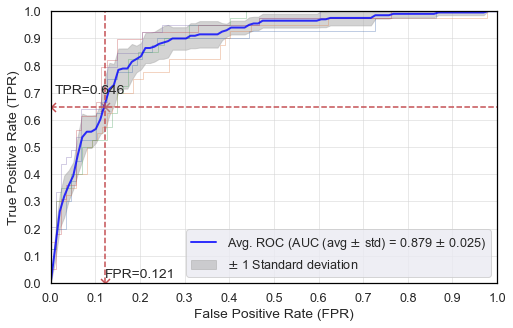


---------------------Average---------------------
AUC (Avg. +/- Std.) is  0.879 +/- 0.025
Accuracy (Avg. +/- Std.) is  0.807 +/- 0.017
Avg. CM is [[25, 10], [14, 77]]
Total for all folds CM is [[128, 53], [70, 385]]


In [ ]:
Accuracy = []                                                                # for store the value of accuracy 
FP = []                                                                      # for store False Positive 
TN = []                                                                      # for True Negative
FN = []                                                                      # for False Negative
TP = []                                                                      # for True Positive
tprs = []                                                                    # for true positive rates
aucs_NB = []                                                                 # for store the values of auc of  model
iterator=0

mean_fpr = np.linspace(0, 1, 100) 
fig = plt.figure(figsize=(8, 5))


for train_index, test_index in kf.split(X_Data,Y_Lavel):                     #split into train and test
#   print("TRAIN:", train_index, "TEST:", test_index)
    X_Train, X_Test = X_Data[train_index], X_Data[test_index]                #train data and label
    Y_Train, Y_Test = Y_Lavel[train_index], Y_Lavel[test_index]              #test  data and label


    #############################################
    # define parameters of Naive Bayes model 
    ############################################
    var_smoothing = [1e-01,
                    1e-02,
                    1e-03,
                    1e-04,
                    1e-05,
                    1e-06,
                    1e-07,
                    1e-08,
                    1e-09,
                    1e-10,
                    1e-11,
                    1e-12]

    tuned_parameters = [{'var_smoothing': var_smoothing}]

    #############################################################
    clf = creat_Model (classifier = GaussianNB(),                             # create model using Naive Bias
                      X_Train = X_Train,
                      Y_Train = Y_Train,
                      tuned_parameters = tuned_parameters,
                      verbose=0)
    tn, fp, fn, tp, roc_auc, fpr, tpr = metrics (y_true = Y_Test,             # model evaluation parameters
                                                y_pred = clf.predict(X_Test),
                                                probas_ = clf.predict_proba(X_Test))
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    aucs_NB.append(roc_auc)
    plot_Current_ROC (fpr,tpr,iterator,roc_auc)                               #plot the roc of current fold
    iterator += 1
    TN.append(tn)
    FP.append(fp)
    FN.append(fn)
    TP.append(tp)
    Accuracy.append(accuracy_score(Y_Test, clf.predict(X_Test)))
average_ROC(mean_fpr,tprs,aucs_NB,TP,TN,FP,FN)                               #plot average roc curve
average_performance(aucs_NB,Accuracy,TP,TN,FP,FN)                            #print the average performance of the model

### Analyzing XGBoost Model

--------------------------------------------------
Detailed classification report for current fold:

              precision    recall  f1-score   support

           0       0.91      0.94      0.93        88
           1       0.86      0.80      0.83        40

    accuracy                           0.90       128
   macro avg       0.89      0.87      0.88       128
weighted avg       0.90      0.90      0.90       128


Area Under ROC (AUC): 0.9444602272727273

Confusion Matrix for current fold: 
[[83  5]
 [ 8 32]]

Accuracy for Current Fold: 0.8984375

--------------------------------------------------
Detailed classification report for current fold:

              precision    recall  f1-score   support

           0       0.85      0.93      0.89        87
           1       0.81      0.65      0.72        40

    accuracy                           0.84       127
   macro avg       0.83      0.79      0.81       127
weighted avg       0.84      0.84      0.84       127


Area U

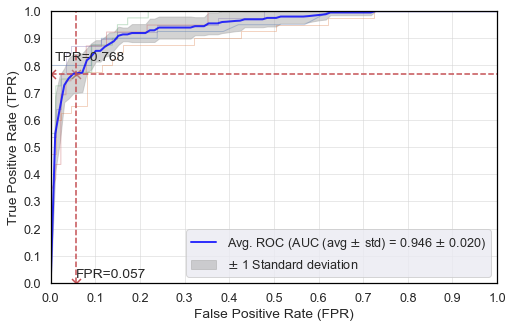


---------------------Average---------------------
AUC (Avg. +/- Std.) is  0.946 +/- 0.020
Accuracy (Avg. +/- Std.) is  0.888 +/- 0.029
Avg. CM is [[30, 5], [9, 82]]
Total for all folds CM is [[152, 25], [46, 413]]
Sensitivity (Avg. +/- Std.) is  0.768 +/- 0.072
Specificity (Avg. +/- Std.) is  0.943 +/- 0.016
Precision (Avg. +/- Std.) is  0.858 +/- 0.041
FOR (Avg. +/- Std.) is  0.100 +/- 0.029
DOR (Avg. +/- Std.) is  71.369 +/- 41.245


In [ ]:
Accuracy = []                                                                # for store the value of accuracy 
FP = []                                                                      # for store False Positive 
TN = []                                                                      # for True Negative
FN = []                                                                      # for False Negative
TP = []                                                                      # for True Positive
tprs = []                                                                    # for true positive rates
aucs_xboost = []                                                                # for store the values of auc
sn = []                                                                      # for sensitivity 
sp = []                                                                      # for specificity
pr = []                                                                      # for precision
FOR = []                                                                     # for False omission rate 
DOR = []                                                                     # for Diagnostic odds ratio (DOR)
iterator=0
mean_fpr = np.linspace(0, 1, 100)
fig = plt.figure(figsize=(8, 5))


for train_index, test_index in kf.split(X_Data,Y_Lavel):                     # split into train and test
#   print("TRAIN:", train_index, "TEST:", test_index)
    X_Train, X_Test = X_Data[train_index], X_Data[test_index]                #train data and label
    Y_Train, Y_Test = Y_Lavel[train_index], Y_Lavel[test_index]              #test data and label

    #####################################
    ## define the parameters 
    ######################################
    tuned_parameters = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.5, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

    clf = creat_Model (classifier = xgb.XGBClassifier(objective = "binary:logistic", eval_metric = 'error', random_state=random_initializer),
                      X_Train = X_Train,                                        # create model using XGB classifier 
                      Y_Train = Y_Train,
                      tuned_parameters = tuned_parameters,
                      verbose=0)
    tn, fp, fn, tp, roc_auc, fpr, tpr = metrics (y_true = Y_Test,               #evaluate the model parameters
                                                y_pred = clf.predict(X_Test),
                                                probas_ = clf.predict_proba(X_Test))
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    aucs_xboost.append(roc_auc)
    plot_Current_ROC(fpr,tpr,iterator,roc_auc)                                  #plot the roc of current fold 
    iterator += 1
    TN.append(tn)
    FP.append(fp)
    FN.append(fn)
    TP.append(tp)
    Accuracy.append(accuracy_score(Y_Test, clf.predict(X_Test)))
    sn.append(tp/(tp+fn))
    sp.append(tn/(fp+tn))
    pr.append(tp/(tp+fp))
    FOR.append(fn/(tn+fn))
    DOR.append((tp*tn)/(fp*fn))

average_ROC(mean_fpr,tprs,aucs_xboost,TP,TN,FP,FN)                              #plot average roc curve
average_performance(aucs_xboost,Accuracy,TP,TN,FP,FN)                           #print the average performance of the model

#####################################################################
#    print the sensitivity,specificity,precision,for,dor of model
#####################################################################
print("Sensitivity (Avg. +/- Std.) is  %0.3f +/- %0.3f" %(np.mean(sn),np.std(sn)))
print("Specificity (Avg. +/- Std.) is  %0.3f +/- %0.3f" %(np.mean(sp),np.std(sp)))
print("Precision (Avg. +/- Std.) is  %0.3f +/- %0.3f" %(np.mean(pr),np.std(pr)))
print("FOR (Avg. +/- Std.) is  %0.3f +/- %0.3f" %(np.mean(FOR),np.std(FOR)))
print("DOR (Avg. +/- Std.) is  %0.3f +/- %0.3f" %(np.mean(DOR),np.std(DOR)))

### Output aucs of all model store in a text file

In [ ]:
algs=['k-nn','dt','rf','ab','nb','xb']

file = open('final_individual_classifer_output.txt','w') 
file.write('k-nn'+'-'*21+'dt'+'-'*12+'rf'+'-'*10+'ab'+'-'*21+'nb'+'-'*21+'xb') 
file.write('\n') 
file.write(all_clf_res[0]+'-'*5+all_clf_res[1]+'-'*3+all_clf_res[2]+'-'*3+all_clf_res[3]+'-'*8+all_clf_res[4]+'-'*9+all_clf_res[5])
file.write('\n')

file.close()